# Exploratory Data Analysis

This is an Data Analysis EDA Project where we use the income_census dataset from https://www.kaggle.com/competitions/census-income/data to see which features can increase one's chance of earning >50k. The following steps would be taken:

- Importing the necessary libraries
- Big picture view of the data
- Missing values
- Dependent variable (income)
- Independent variables
- Other relationships (if necesary)
- Conclusion

### 1 - Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
dataset =  pd.read_csv("income_census.csv",na_values='?')
dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### 2 - Big picture view of the data

In [6]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
dataset.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
dataset.shape

(32561, 15)

In [12]:
dataset.describe() #Describes only numerical values.

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
dataset.nunique() #Gives the number of unique values we have per column.

age                  73
workclass             8
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       41
income                2
dtype: int64

### 3 - Missing values

In [19]:
dataset.isna().any()

age               False
workclass          True
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income            False
dtype: bool

### 4 - Dependent variable (income)

In [21]:
dataset.groupby('income').size()

income
<=50K    24720
>50K      7841
dtype: int64

In [25]:
dataset.groupby('income')['age'].count()/len(dataset)

income
<=50K    0.75919
>50K     0.24081
Name: age, dtype: float64

<AxesSubplot:xlabel='income', ylabel='count'>

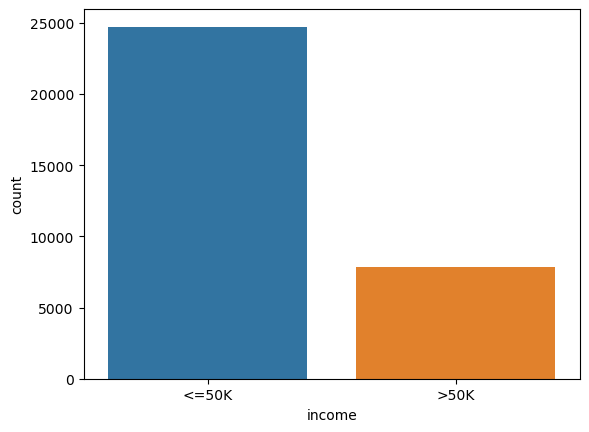

In [26]:
sns.countplot(x='income', data = dataset)

We noticed from the data that only about 24% have an income >50k

### 5 - Independent variables

#### 5.1 - Age

In [27]:
dataset['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

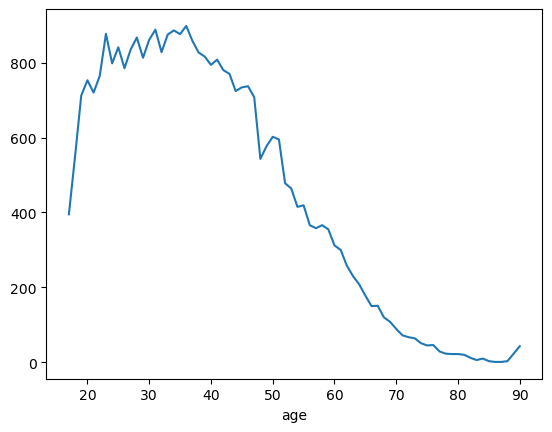

In [40]:
dataset.groupby('age').size().plot() #Grouping the data according to various ages and ploting their graph.

<AxesSubplot:xlabel='age', ylabel='count'>

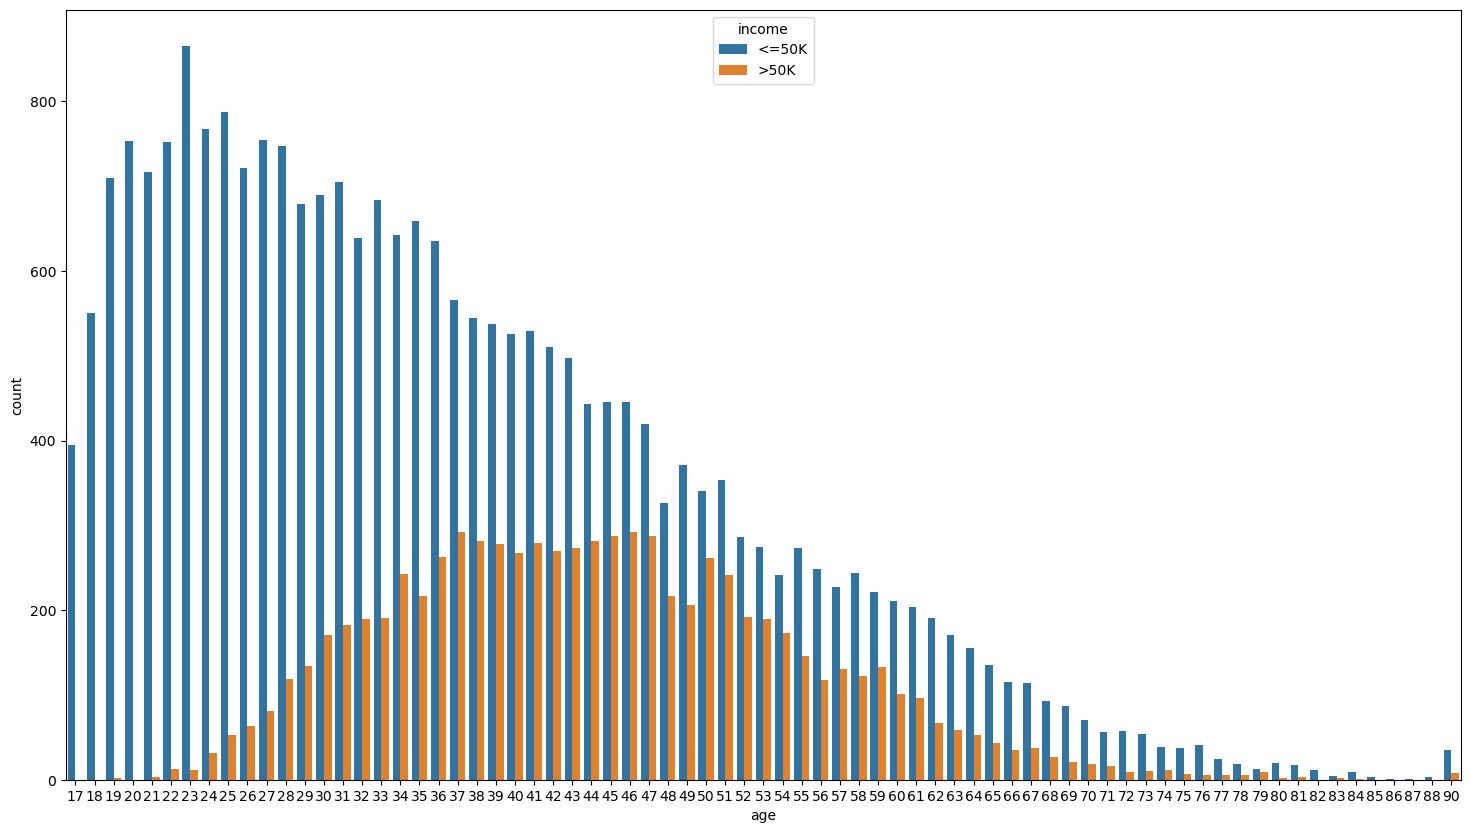

In [43]:
plt.figure(figsize= (18,10))
sns.countplot(x='age',hue='income', data = dataset)

we notice that from age 33 to 50 there is at least a 50% chance of earning >50k

#### 5.2 - Hours per Week

In [44]:
dataset['hours.per.week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64

In [47]:
dataset.groupby('hours.per.week').size().max()

15217

<AxesSubplot:xlabel='hours.per.week'>

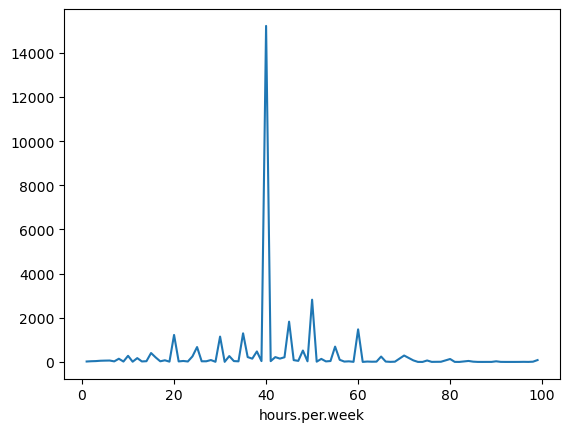

In [48]:
dataset.groupby('hours.per.week').size().plot()

From the data 15217 work 40 hours in a week.

<AxesSubplot:xlabel='hours.per.week'>

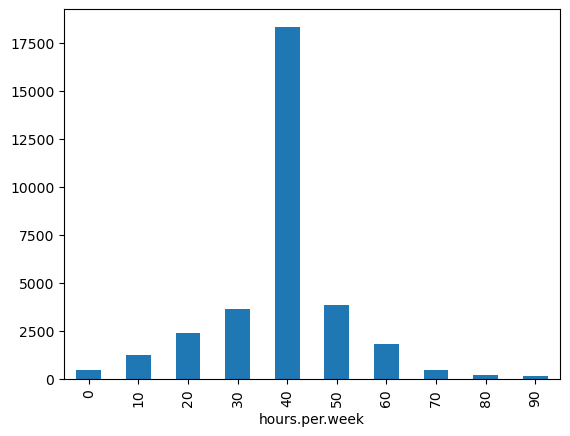

In [51]:
dataset.groupby(dataset['hours.per.week']//10*10)['income'].size().plot(kind = 'bar')

In [54]:
dataset['hours.per.week2'] = np.where(dataset['hours.per.week']<40,'<40','>=40') #Creating a new field in the dataset with indication if hours.per.week is >40 or <40
dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hours.per.week2
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K,>=40
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,<40
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K,>=40
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,>=40
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,>=40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,>=40
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,<40
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,>=40
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,>=40


<AxesSubplot:xlabel='hours.per.week2', ylabel='count'>

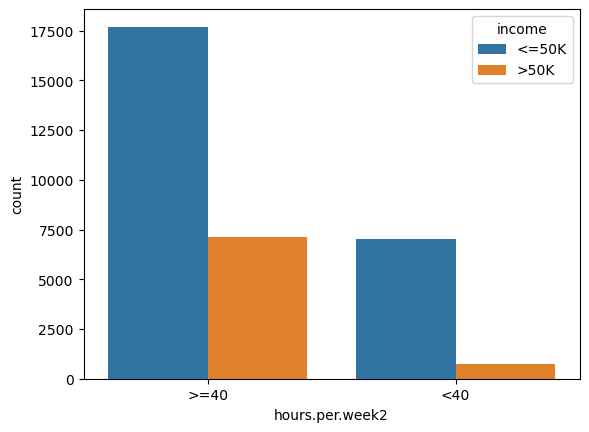

In [55]:
sns.countplot(x='hours.per.week2', hue='income',data=dataset)

<AxesSubplot:xlabel='hours.per.week', ylabel='count'>

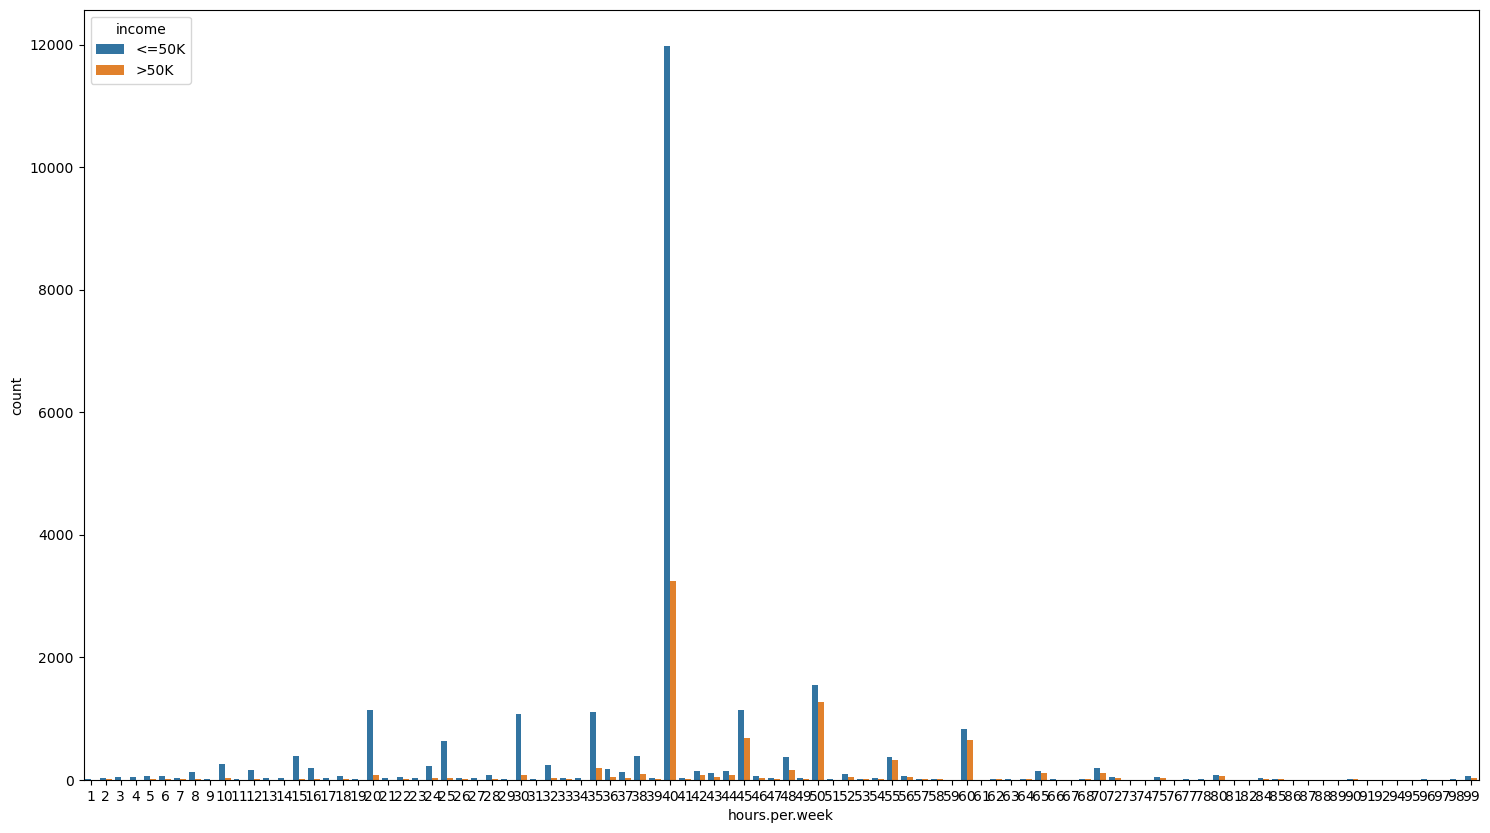

In [49]:
plt.figure(figsize= (18,10))
sns.countplot(x='hours.per.week',hue='income', data = dataset)

Roughly 25% of those working for 40 hours per week have as income >50k

#### 5.3 - Marital status

In [56]:
dataset['marital.status'].describe()

count                  32561
unique                     7
top       Married-civ-spouse
freq                   14976
Name: marital.status, dtype: object

<AxesSubplot:xlabel='marital.status'>

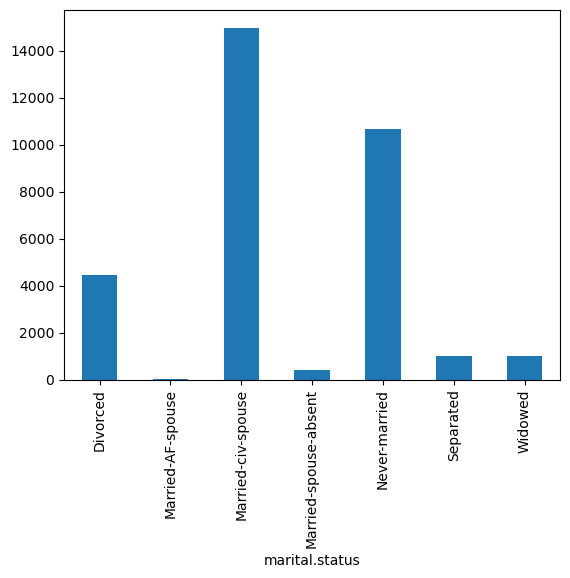

In [58]:
dataset.groupby('marital.status').size().plot(kind = 'bar')

<AxesSubplot:xlabel='marital.status', ylabel='count'>

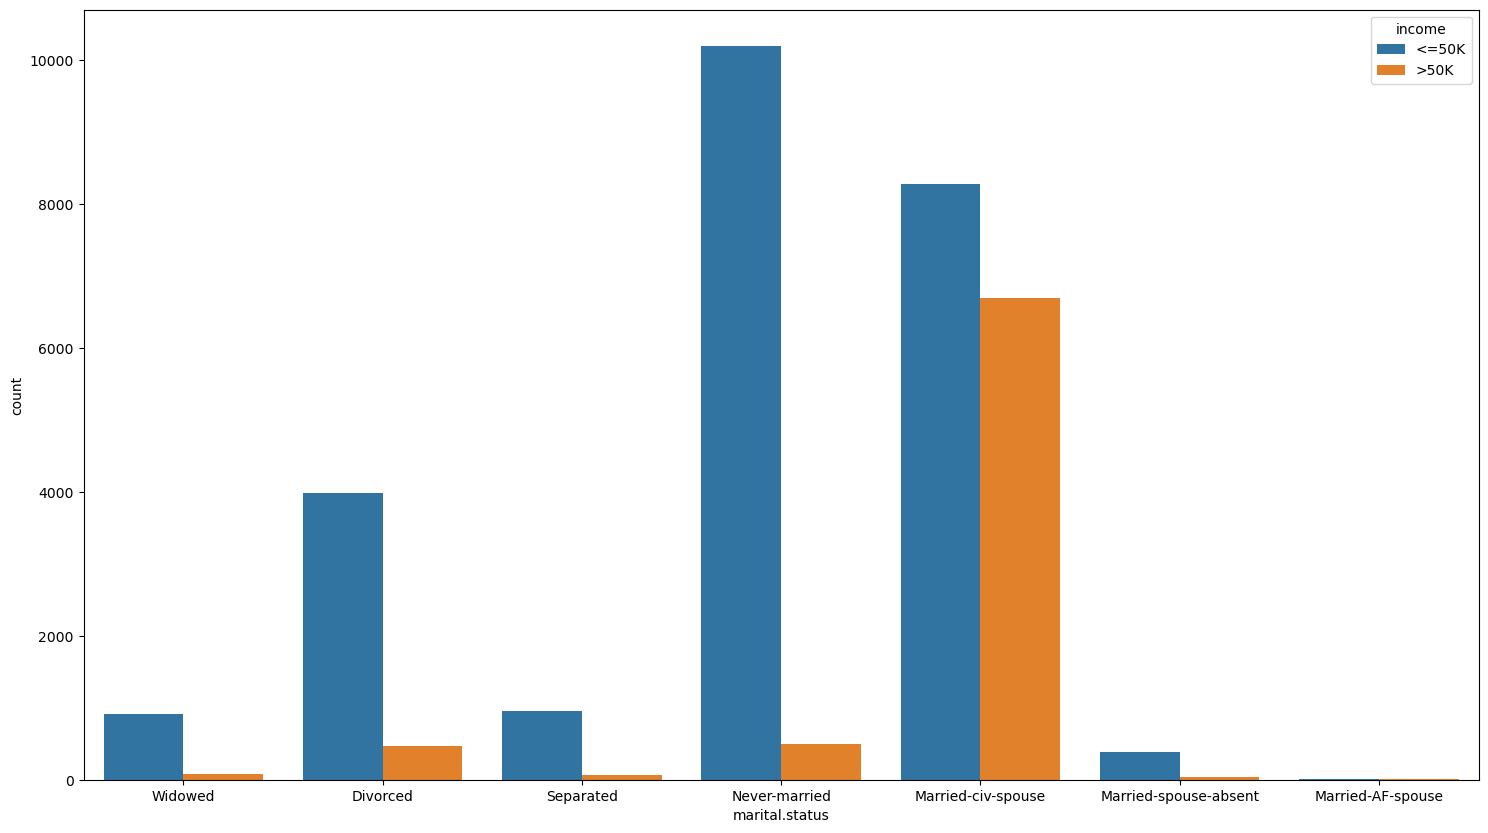

In [60]:
plt.figure(figsize= (18,10))
sns.countplot(x='marital.status',hue='income', data = dataset)

From the chart, we observe that roughly 45% of those who are married-cv-spouse earn >50k

#### 5.4 - Sex

In [61]:
dataset['sex'].describe()

count     32561
unique        2
top        Male
freq      21790
Name: sex, dtype: object

<AxesSubplot:xlabel='sex', ylabel='count'>

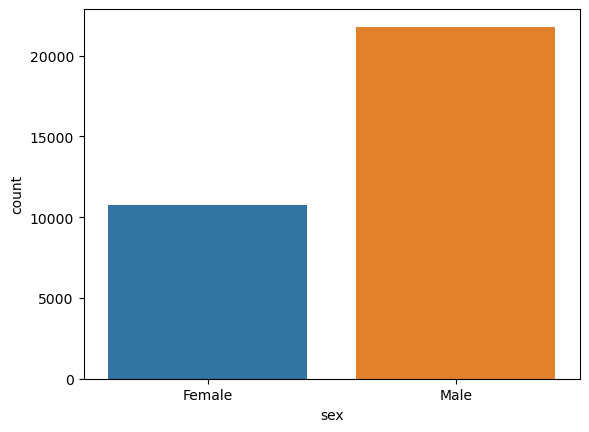

In [62]:
sns.countplot(x='sex', data = dataset)

<AxesSubplot:xlabel='sex', ylabel='count'>

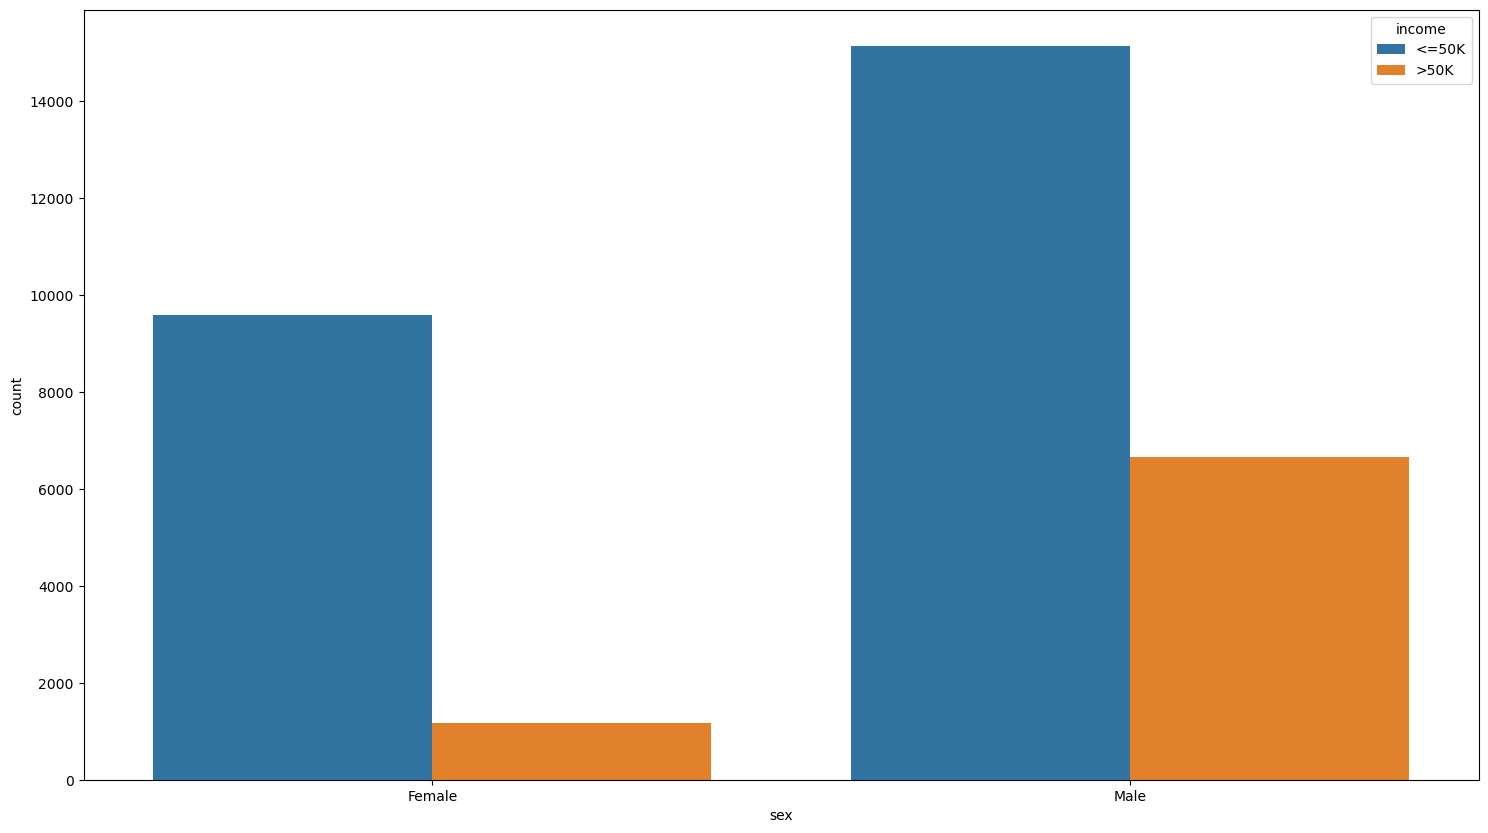

In [63]:
plt.figure(figsize= (18,10))
sns.countplot(x='sex',hue='income', data = dataset)

#### 5.4 - Work Class

In [73]:
dataset['workclass'].describe()

count       30725
unique          8
top       Private
freq        22696
Name: workclass, dtype: object

<AxesSubplot:xlabel='workclass', ylabel='count'>

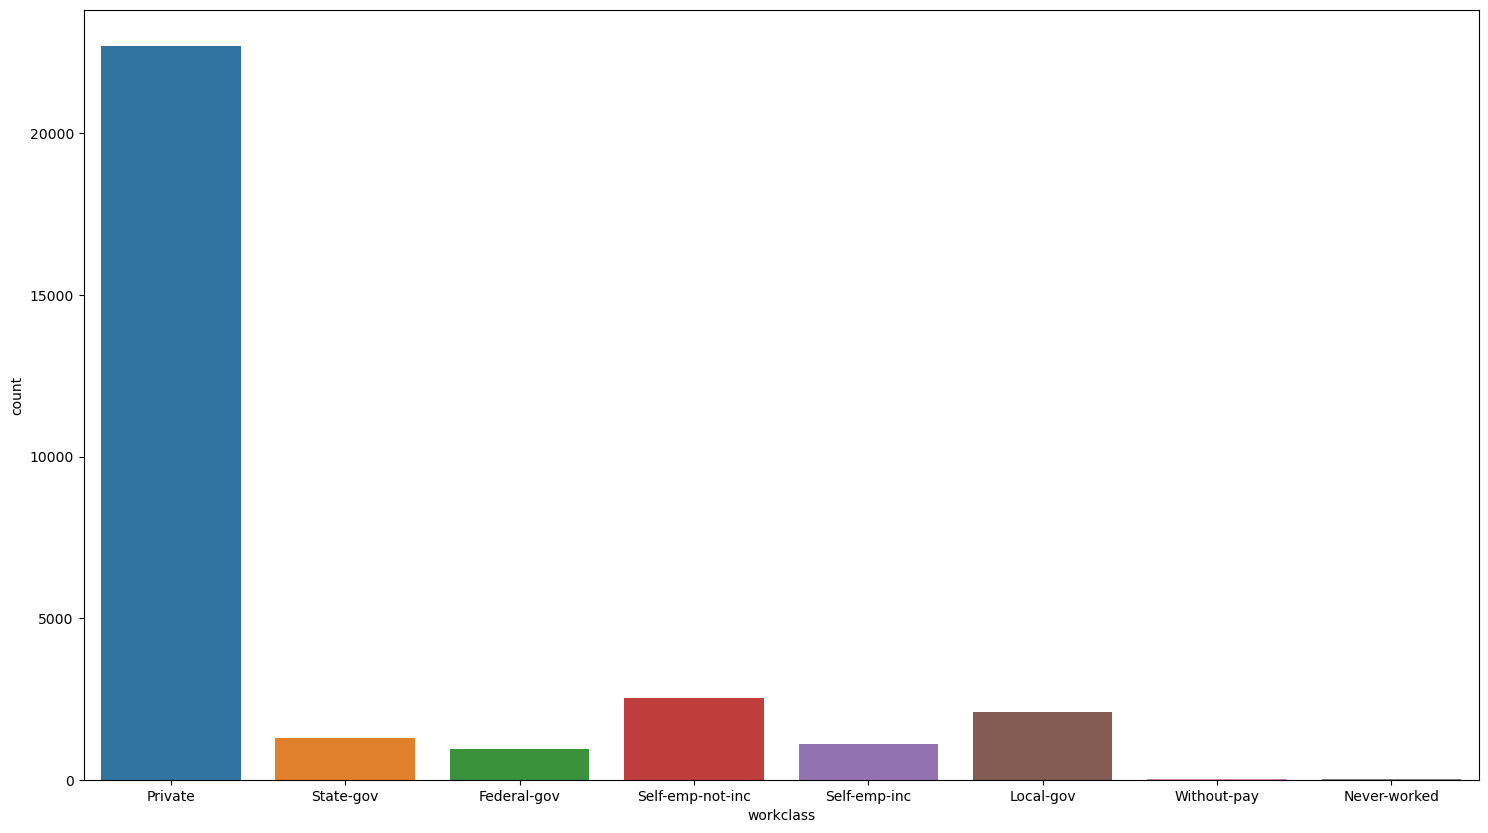

In [75]:
plt.figure(figsize= (18,10))
sns.countplot(x='workclass', data = dataset)

<AxesSubplot:xlabel='workclass', ylabel='count'>

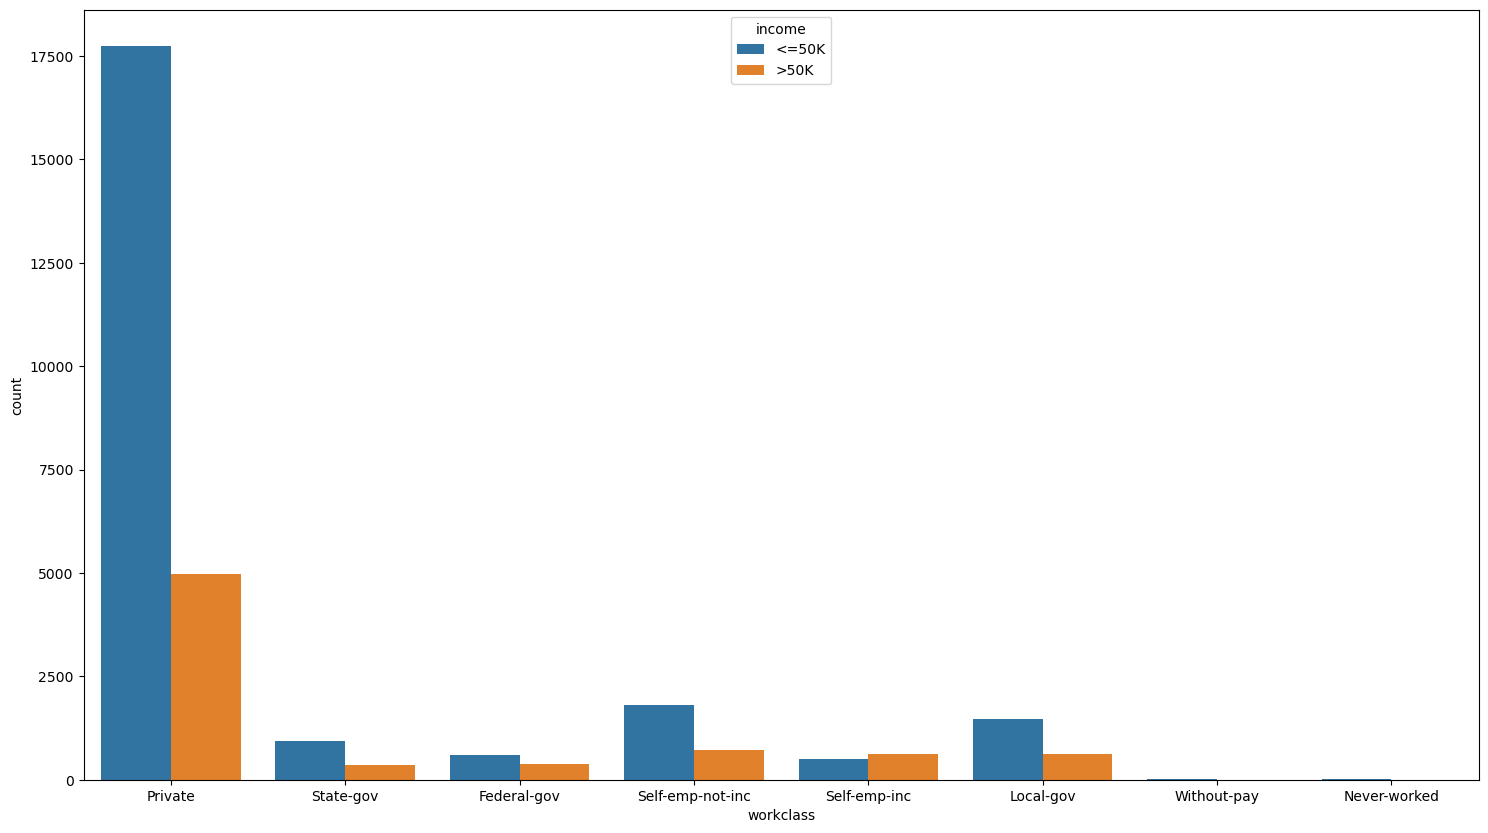

In [76]:
plt.figure(figsize= (18,10))
sns.countplot(x='workclass',hue='income', data = dataset)

 ### 6 - Other relationships (if necesary)

<AxesSubplot:xlabel='marital.status', ylabel='count'>

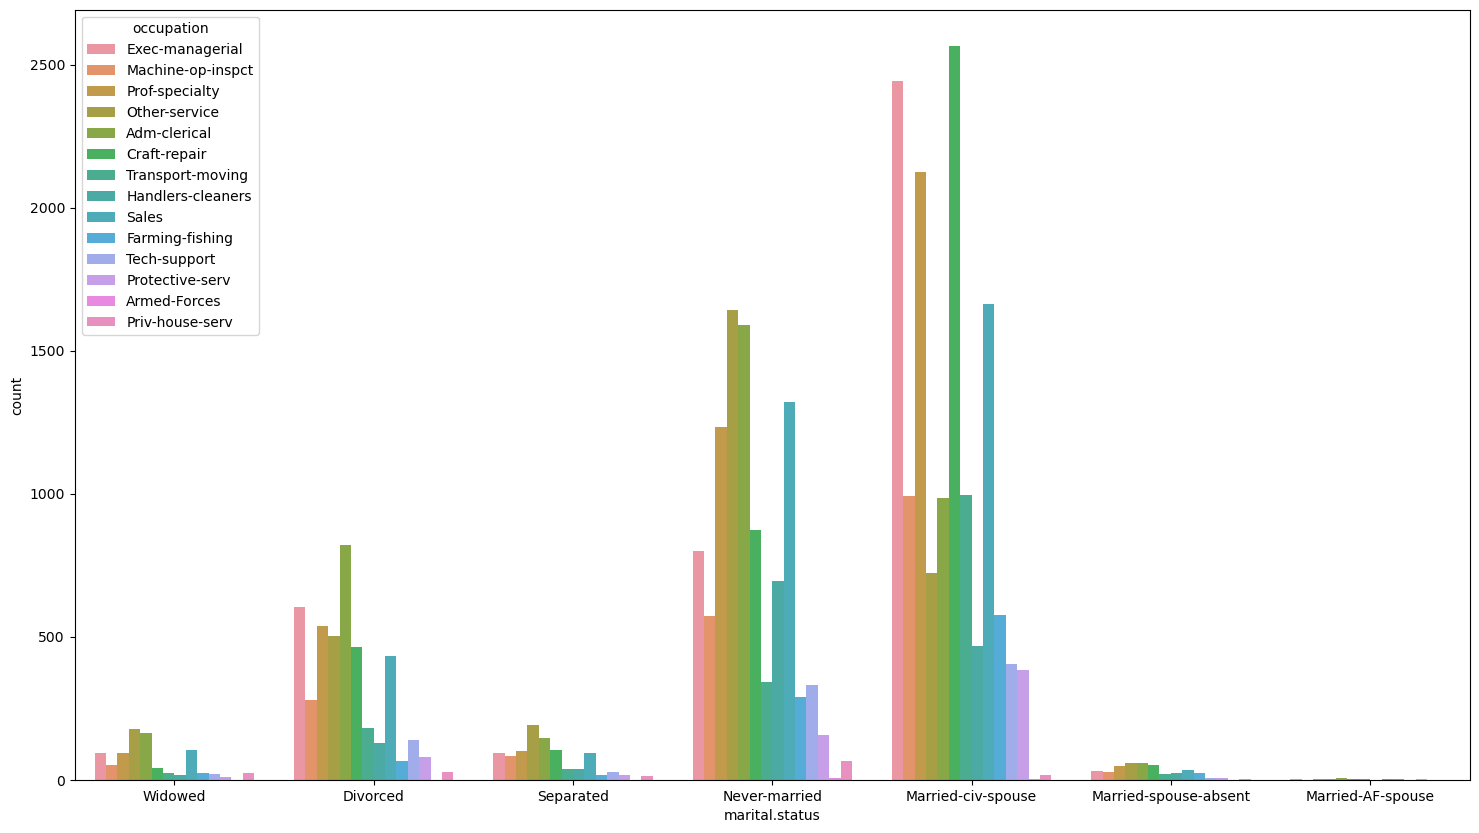

In [64]:
plt.figure(figsize= (18,10))
sns.countplot(x='marital.status',hue='occupation', data = dataset)

<AxesSubplot:xlabel='sex', ylabel='count'>

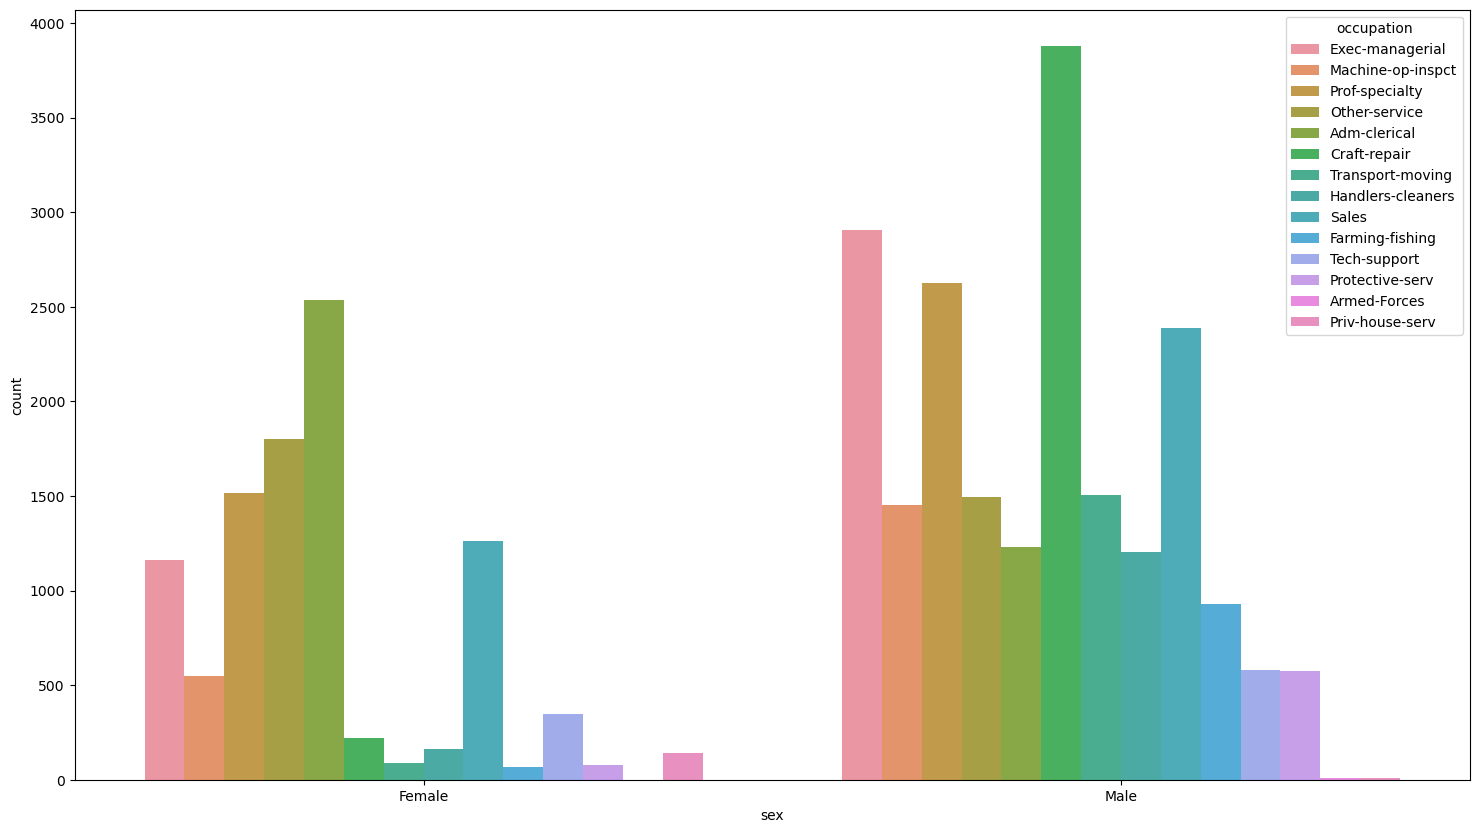

In [66]:
plt.figure(figsize= (18,10))
sns.countplot(x='sex',hue='occupation', data = dataset)

<AxesSubplot:xlabel='hours.per.week', ylabel='count'>

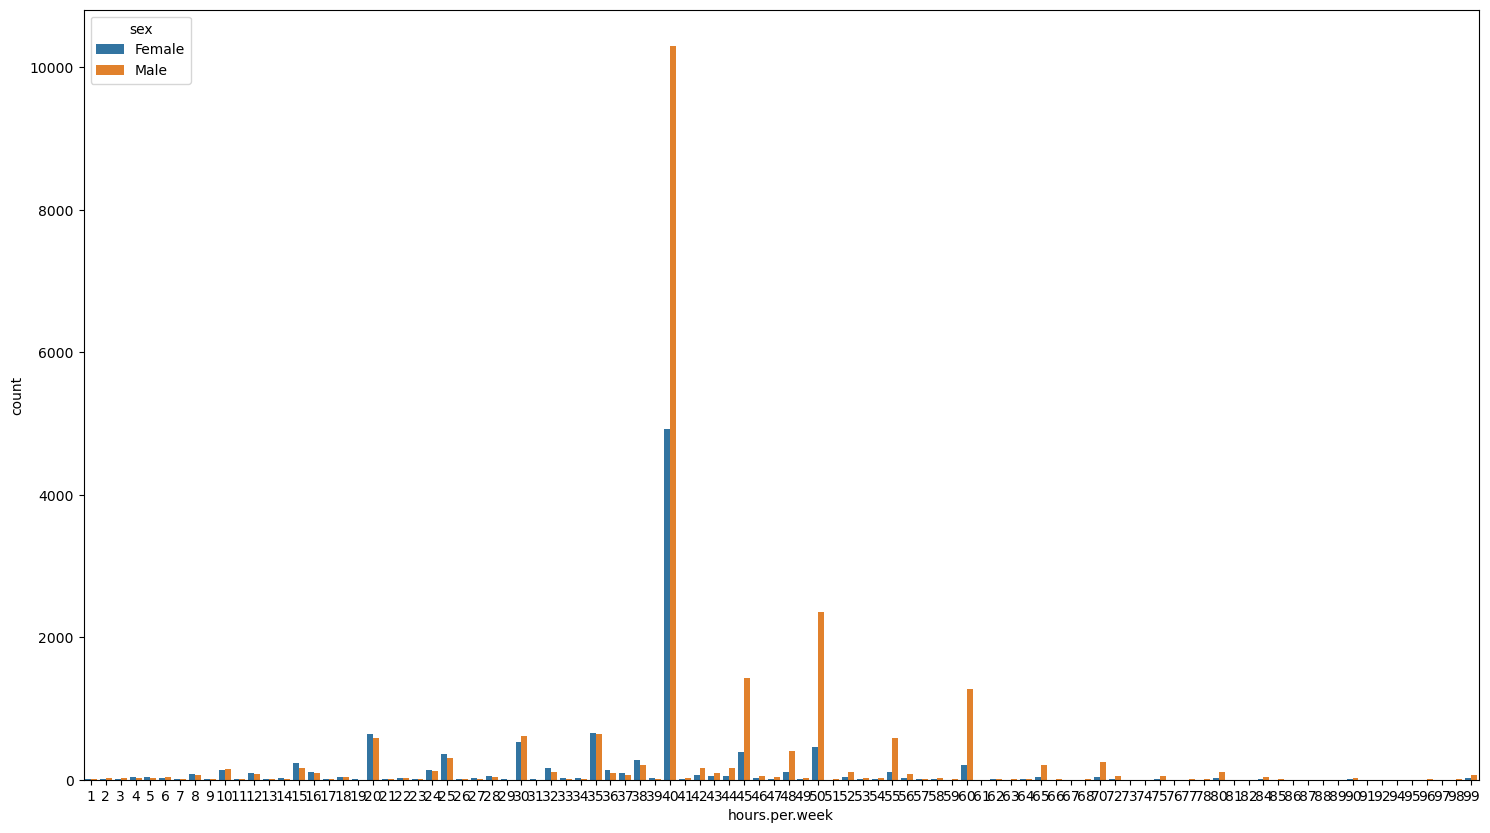

In [70]:
plt.figure(figsize= (18,10))
sns.countplot(x='hours.per.week',hue='sex', data = dataset)

<AxesSubplot:xlabel='workclass', ylabel='count'>

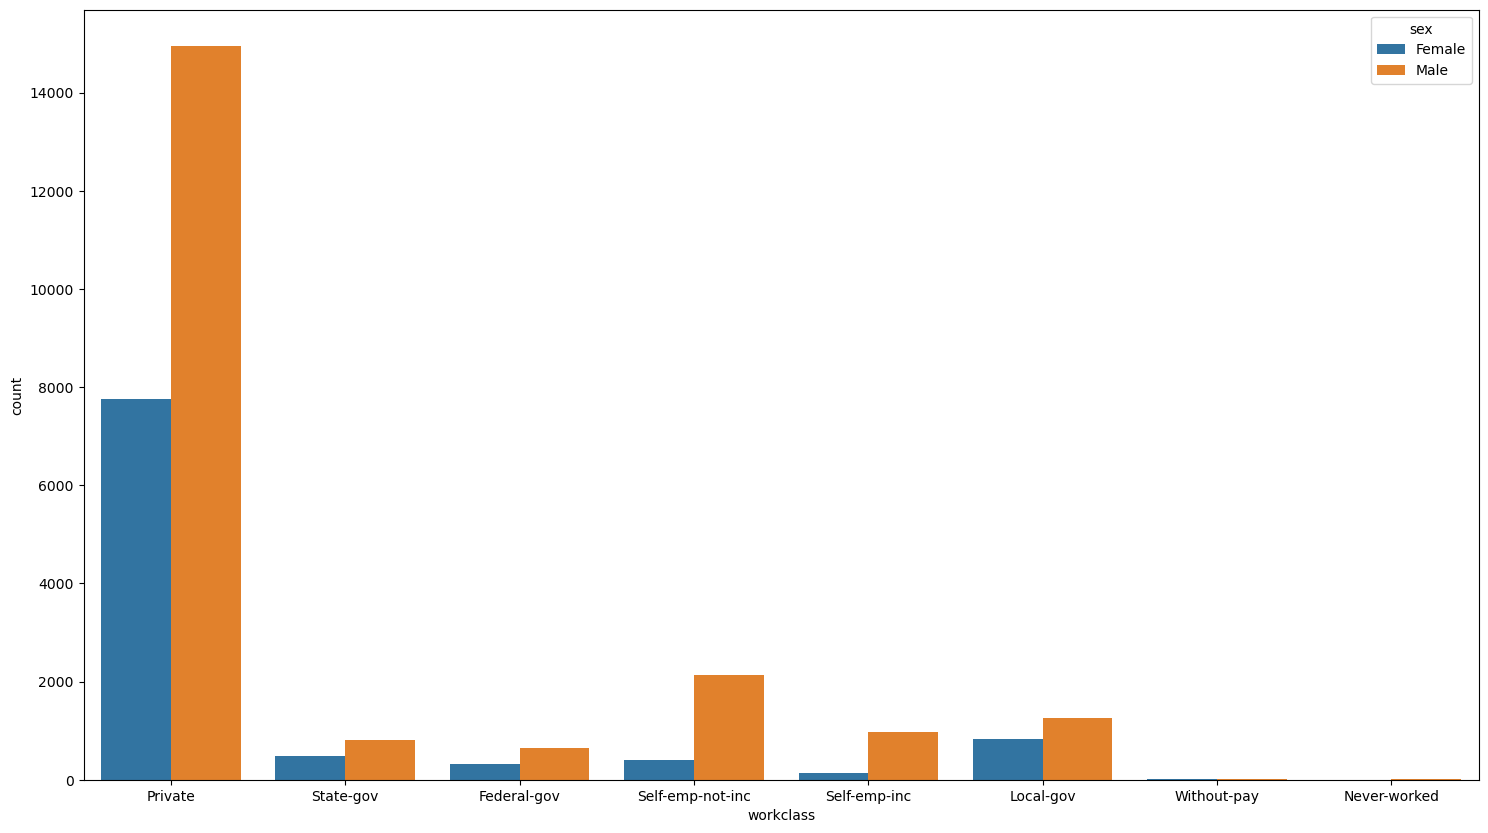

In [77]:
plt.figure(figsize= (18,10))
sns.countplot(x='workclass',hue='sex', data = dataset)

 ### 7 - Conclusion

- There more males than females. 21790 out of 32561.
- Craft repair is the highest occuppation and mostly done by men.
- There are 14976 married-civ-spouse
- Roughly 45% of those who are married-cv-spouse earn >50k
- Roughly 35% of those working for 40 hours and above per week earn >50k
- 15217 people work for 40 hours per week
- Roughly 70% of people work in the private sector. 22696 people. Where we have more men than women

For one to have chances of earning >50K one should be male, be aged between 30 and 55 years old, be a married-civ-spouse, working in the private sector and having craft repair as occupation.
